#Proyecto: Predicción de retorno de clientes.

###Eduardo Cruz Vega

## 0) Importación de librerías

In [ ]:
#importación de librerías a usar

#manipulación y análisis de datos
import pandas as pd

#manipulacipn de arrays eficientemente
import numpy as np

#Creación de de gráficos y visualización de datos
import matplotlib.pyplot as plt

#visualización complejas
import seaborn as sns

###1) Cargar el archivo CSV synthetic_customer_data.csv en un DataFrame usando Pandas y mostrar las primeras filas para comprender la estructura de los datos.

In [ ]:
#primero cargué el dataset en mi github personal, este es el link

github_link='https://raw.githubusercontent.com/ECV21/data-science-portafolio/refs/heads/main/synthetic_customer_data.csv'

In [ ]:
#Aquí mandamos llamar el dataset usando el link anterior; ver las primeras 5 líneas

df = pd.read_csv(github_link)
df.head()

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,Male,200.50,5,12,1,1
1,2,34,Female,120.75,2,30,0,0
2,3,28,Male,315.00,6,5,1,1
3,4,45,Female,150.00,3,15,1,0
4,5,42,Male,175.50,4,25,0,0


##2) Mostrar información básica del DataFrame, como el tipo de datos de cada columna y calcular estadísticas descriptivas para cada variable.

In [ ]:
#con este comando podremos ver el tipo de datos de cada columna;
#tenemos columnas que son: INT, FLOAT y string=object

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               100 non-null    int64  
 1   age                       100 non-null    int64  
 2   gender                    100 non-null    object 
 3   total_spent               100 non-null    float64
 4   frequency                 100 non-null    int64  
 5   days_since_last_purchase  100 non-null    int64  
 6   marketing_engaged         100 non-null    int64  
 7   returned_next_month       100 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.4+ KB


In [ ]:
#otra forma de ver el tipo de datos de cada una de las columnas

df.dtypes

,0
customer_id,int64
age,int64
gender,object
total_spent,float64
frequency,int64
days_since_last_purchase,int64
marketing_engaged,int64
returned_next_month,int64


In [ ]:
# Información básica del dataset; veremos la estadística b+asica

#por ejemplo: son 100 registros; edad media es 34; edad máxima 45; edad mínim 25:
# gasto medio es de: 213 pesos; gasto máximo:315 pesos;
print("Información básica del dataset:\n", df.describe())

Información básica del dataset:
        customer_id         age  total_spent   frequency  \
count   100.000000  100.000000   100.000000  100.000000   
mean     50.500000   34.300000   213.250000    4.500000   
std      29.011492    6.163595    59.069596    1.507557   
min       1.000000   25.000000   120.750000    2.000000   
25%      25.750000   29.000000   175.500000    3.000000   
50%      50.500000   33.500000   207.875000    4.500000   
75%      75.250000   40.000000   240.000000    6.000000   
max     100.000000   45.000000   315.000000    7.000000   

       days_since_last_purchase  marketing_engaged  returned_next_month  
count                100.000000         100.000000           100.000000  
mean                  14.700000           0.600000             0.500000  
std                    7.681146           0.492366             0.502519  
min                    5.000000           0.000000             0.000000  
25%                    9.000000           0.000000             0.

In [ ]:
#ver el tamaño del dataset

df.shape
#númro de filas y columnas

(100, 8)

##3. Visualización de Datos:

Generar histogramas para analizar la distribución de age y total_spent.
Crear un gráfico de barras para observar la distribución de gender.

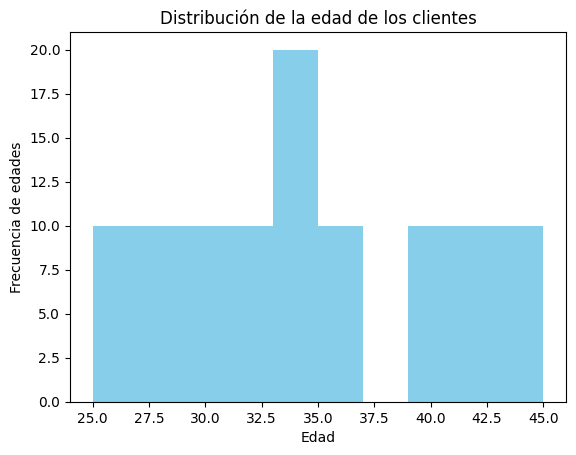

In [ ]:
## Histograma de EDAD

plt.hist(df['age'], color='skyblue') ##bins=10,
plt.title('Distribución de la edad de los clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia de edades')
plt.show()

#Aquí vemos que hay 20 personas con 35 años de edad; las demás edades tiene frecuencia de 10

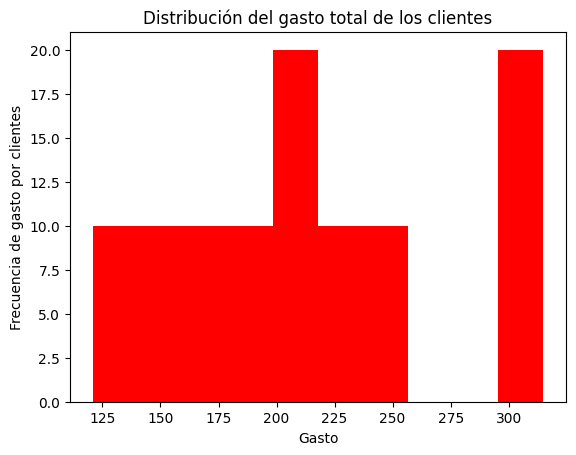

In [ ]:
## Histograma de gasto total

plt.hist(df['total_spent'], color='red') ##bins=10,
plt.title('Distribución del gasto total de los clientes')
plt.xlabel('Gasto')
plt.ylabel('Frecuencia de gasto por clientes')
plt.show()

#vemos que la medai del gasto ronda entre los 200 pesos; 20 pesonas tuvieron ese gasto

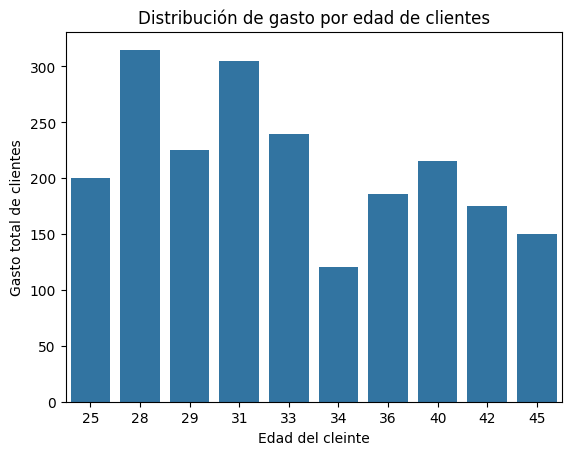

In [ ]:
# Ver la distribución del gasto por edad de los clientes

sns.barplot(x='age', y='total_spent', data=df)
plt.title('Distribución de gasto por edad de clientes')
plt.xlabel('Edad del cleinte')
plt.ylabel('Gasto total de clientes')
plt.show()

#el mayor gasto se presentó en las edades de 28 y 31 años.

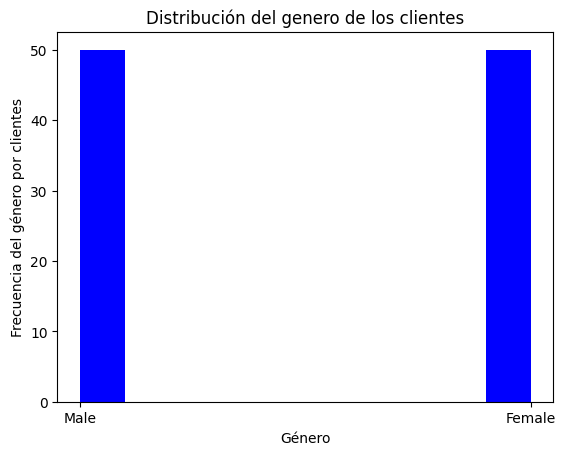

In [ ]:
# Distribución de género

plt.hist(df['gender'], color='blue') ##bins=10,
plt.title('Distribución del genero de los clientes')
plt.xlabel('Género')
plt.ylabel('Frecuencia del género por clientes')
plt.show()

#aquí vemos que básicamente hay 50% de mujeres y hombres

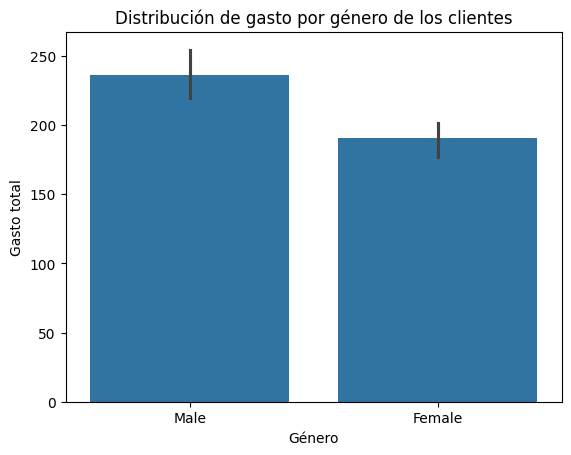

In [ ]:
# distribución de gasto por género

sns.barplot(x='gender', y='total_spent', data=df)
plt.title('Distribución de gasto por género de los clientes')
plt.xlabel('Género')
plt.ylabel('Gasto total')
plt.show()

#aquí vemos que en promedio los hombres (Male) gastaron más que las mujeres (Famale)

In [ ]:
#suma del gasto total
df[['total_spent']].sum()

,0
total_spent,21325.0


4. Preprocesamiento de los Datos:

Verificar si existen valores nulos en el conjunto de datos y documentar los resultados.
Codificar la variable gender en valores numéricos (0 para Female, 1 para Male).
Escalar las columnas numéricas (age, total_spent, frequency, days_since_last_purchase) usando StandardScaler para asegurar consistencia en las escalas.

In [ ]:
#Verificar si existen valores nulos en el conjunto de datos

df.info()

#Aquí vemos que en la columna "Column" están los nombres de las columnas
# y en la columna "Non-Null Count" nos indica si hay columnas null, no hay columnas null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               100 non-null    int64  
 1   age                       100 non-null    int64  
 2   gender                    100 non-null    object 
 3   total_spent               100 non-null    float64
 4   frequency                 100 non-null    int64  
 5   days_since_last_purchase  100 non-null    int64  
 6   marketing_engaged         100 non-null    int64  
 7   returned_next_month       100 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 6.4+ KB


In [ ]:
#otra forma de verificar si las columnas tienen valores nulls

df.isnull().sum()

,0
customer_id,0
age,0
gender,0
total_spent,0
frequency,0
days_since_last_purchase,0
marketing_engaged,0
returned_next_month,0


In [ ]:
#Codificar la variable gender en valores numéricos (0 para Female, 1 para Male).

df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})
df.head()


#otra forma de codificar:
#costumer_data['gender'] = costumer_data['gender'].map({'Female': 0, 'Male': 1}).astype(int)
#costumer_data['gender']

<ipython-input-16-dd8de5a1abd3>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})


,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,25,1,200.50,5,12,1,1
1,2,34,0,120.75,2,30,0,0
2,3,28,1,315.00,6,5,1,1
3,4,45,0,150.00,3,15,1,0
4,5,42,1,175.50,4,25,0,0


In [ ]:
#importar un librería de preprocesamiento de datos
from sklearn.preprocessing import StandardScaler


#StandardScaler transforma los datos de tal forma que la media de CERO y
#una desviación estándar de 1

In [ ]:
#Escalar las columnas numéricas (age, total_spent, frequency, days_since_last_purchase) usando StandardScaler para asegurar consistencia en las escalas.


#creamos una instancia: un objeto que nos ayudará a estandarizar
scaler = StandardScaler()

#aquí usamos "fit_transform()" para decirle a la instancia anterior estandarice las sig columnas
scaler.fit_transform(df[['age', 'total_spent', 'frequency', 'days_since_last_purchase']])


#aquí aplicamos la transdormaicón a las columnas y las guarda en el mismo dataframe
df[["age","total_spent","frequency","days_since_last_purchase"]]=scaler.transform(df[["age","total_spent","frequency","days_since_last_purchase"]])

In [ ]:
#ver los datos ya estandarizado (media cera de cero y desviación estandar cerca de 1)

df.head(10)

,customer_id,age,gender,total_spent,frequency,days_since_last_purchase,marketing_engaged,returned_next_month
0,1,-1.516461,1,-0.216934,0.333333,-0.353281,1,1
1,2,-0.048918,0,-1.573838,-1.666667,2.001925,0,0
2,3,-1.027280,1,1.731222,1.000000,-1.269194,1,1
3,4,1.744746,0,-1.076165,-1.000000,0.039253,1,0
4,5,1.255565,1,-0.642296,-0.333333,1.347701,0,0
5,6,-0.211978,0,0.455137,0.333333,-1.007505,1,1
6,7,-0.538099,1,1.561078,1.666667,-0.745815,1,1
7,8,0.929444,0,0.034029,-0.333333,-0.091591,0,0
8,9,0.277203,1,-0.472152,-1.000000,0.693477,1,0
9,10,-0.864220,0,0.199920,1.000000,-0.614970,0,1


In [ ]:
#aquí vemos que las columnas estan estandaizads porque tiene una desviación de 1 y una media cerca de CERO
df[["age","total_spent","frequency","days_since_last_purchase"]].describe()

,age,total_spent,frequency,days_since_last_purchase
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,4.329870e-16,-1.776357e-17,-4.440892e-18,5.440093e-17
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.516461e+00,-1.573838e+00,-1.666667e+00,-1.269194e+00
25%,-8.642198e-01,-6.422962e-01,-1.000000e+00,-7.458152e-01
50%,-1.304483e-01,-9.145277e-02,0.000000e+00,-2.224361e-01
75%,9.294439e-01,4.551370e-01,1.000000e+00,6.934773e-01
max,1.744746e+00,1.731222e+00,1.666667e+00,2.001925e+00


##5. Dividir los Datos en Entrenamiento y Prueba:

* Definir las características (X) y la variable objetivo (y), que es returned_next_month.
* Dividir los datos en un conjunto de entrenamiento y otro de prueba (80/20).

In [ ]:
#impotamos librería que divide los datos en ENTRENAMIENTO y PRUEBA


from sklearn.model_selection import train_test_split

In [ ]:
#seleccionamos características para la varibale X

#creamos un nuedo dataframe que contien las variables independientes del modelo
X=df.drop(["age","total_spent","frequency","days_since_last_purchase"],axis=1)


#variable objetivo
y=df["returned_next_month"]

#hacemos la división de los datos en 4 conjunto: datos de entrenamiento(X_train),
#datos de validación(X_val), datos objetivos de entrenamiento (y_train) y datos de
#variable objetivo de validación(y_val)
# 20% será para validación y 80% de datos para entrenamiento;
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

##6. Entrenamiento de Modelos:

* Seleccionar tres modelos de clasificación: Regresión Logística, Árbol de Decisión y Bosque Aleatorio.
* Entrenar cada modelo usando los datos de entrenamiento.

* Regresión logística: Este modelo calcula la probabilidad de que algo pertenza a una clase. Si la probabilidad es menor a 0.5 entonces pertenece a la clase A, si la probabildiad es mayor a 0.5, entonces pertence a la calse B.

* Árbol de decisión: básicamente es un diagrama de flujo que hace preguntas de tipo "sí/no". El modelo va pregutnando si las características son, por ejemplo: mayor a 30 años?, gasto mayor a 150?, etc hasta llegar a una clasificación final.

* Bosque aleatorio: en lugar de utilizar un solo árbol de decisión se construye un bosque con mucho árboles de decision; cada árbol se entrena con una parte diferente de los datos de entrenamiento. Al final cada árbol vota por una clase, el dato se clasificará en la clase con mayor voto.

##Modelo logístico

In [ ]:
#importación de librerías para realizar regresión logística

from sklearn.linear_model import LogisticRegression #para construir modelo logística
from sklearn.metrics import accuracy_score #calcular precisión

In [ ]:
# Regresión logística

#creamos un objeto del modelo de regresión logística
modelo_log = LogisticRegression()

#Entrenamos el modelo de regrsión log´sictica usando datos de entrenamiento
modelo_log.fit(X_train, y_train)

#usamos el modelo entrenado para hacer prediccioness usando el conjuto de datos de validación
y_pred = modelo_log.predict(X_val)

#Accuracy score: de todas las predicciones que hizo el modelo, qué porcentaje fueron correctas.
precision = accuracy_score(y_val, y_pred) #valor real vs valor predicho
print(f"Precisión de modelo : {precision}")

Precisión de modelo : 1.0


###Modelo de árbol de decisión

In [ ]:
#importación de librerías para relaizar árbol de decisión

#librería para construir un árbol de desición
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
#árbol de decisión

#creamos una instancia del modelo de árbol, usamos 10 hojas (nodos finales donde se toma decisiones finales)
modelo_arbol = tree.DecisionTreeClassifier(max_leaf_nodes = 10)

#Entrennamos el modelo, aquí aprened las reglas usando "fit"
modelo_arbol.fit(X_train, y_train)

#claculamos las precisión del modelo; puntuación cercana a 1 es que aprendió bien
modelo_arbol.score(X_train, y_train)

1.0

###Bosque aleatorio

In [ ]:
#importación de librerías para realizar bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Bosque aleatorio

#creamos una instancia del modelo de BOSQUE ALEATORIO
modelo_bosque=RandomForestClassifier(n_estimators=19, #definimos 19 árboles individuales de decisión
                               random_state=2016, #fijamos una semilla aleatorioa
                               min_samples_leaf=8,) #definimos 6 hojas para difinir una clase del los datos


#entrenamos el modelo usanod "fit", así aprende el modelo
modelo_bosque.fit(X_train, y_train)


#evaluamos el modelo, vemos la precisión: qué tambien se ajusta el modelo a los datos vistos
modelo_bosque.score(X_train, y_train)

1.0

##7. Evaluación Inicial de Modelos:

* Evaluar cada modelo en el conjunto de prueba usando métricas de rendimiento: exactitud, precisión, recall, F1 y AUC-ROC.
* Comparar los resultados y documentarlos para seleccionar el mejor modelo.

In [ ]:
#librarías para realizar pruebas de rendimeinto de los mdelos

#importamos funciones para evalida claisficaicón
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

#libre´ria para medir rendimeinto en modelos de regresión
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#herrameinta para la optimización de hiperparámetros del modelo(busca mejor coambiación de configuración de modelo)
from sklearn.model_selection import GridSearchCV

#nos da un reporte de las principales métricas de clasifiación
from sklearn.metrics import classification_report

In [ ]:
#Evaluaci+on modelo de regresión logística

#Genera predicciones de modelo de regresión logística sobre los datos de validación
y_pred_log = modelo_log.predict(X_val)

#Calcular % de predicciones correcta sobre predicciones totoales
accuracy = accuracy_score(y_val, y_pred_log)


print("'Este es el resultados de Regresión Logística:")
print("exactitud:", accuracy_score(y_val, y_pred_log))
print("Precisión:", precision_score(y_val, y_pred_log))
print("Recall:", recall_score(y_val, y_pred_log))
print("F1-Score:", f1_score(y_val, y_pred_log))
print("Auc-roc:", roc_auc_score(y_val, y_pred_log))

'Este es el resultados de Regresión Logística:
exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1-Score: 1.0
Auc-roc: 1.0


In [ ]:
# evaluación modelo Árbol de decisiónes


#Generar ´predicciones del modelo de árbol de decision usando datos de validación
y_pred_arbol = modelo_arbol.predict(X_val)


#calcular métricas de evalición del modelo
print("Estos son los resultados delÁrbol de Decisión:")
print("Exactitud:", accuracy_score(y_val, y_pred_arbol))
print("Precision:", precision_score(y_val, y_pred_arbol))
print("Recall:", recall_score(y_val, y_pred_arbol))
print("F1-score:", f1_score(y_val, y_pred_arbol))
print("Auc-roc:", roc_auc_score(y_val, y_pred_arbol))

Estos son los resultados delÁrbol de Decisión:
Exactitud: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Auc-roc: 1.0


In [ ]:
#Evaluación del modelo de Bosque aleatorio

#generar predicciones del modelo de bosque aleatorio usando datos de validación
y_pred_bosque = modelo_bosque.predict(X_val)


# Evaluar el modelo de Bosque Aleatorio
print("'Estoa son los resultados del Bosque Aleatorio:")
print("Accuracy:", accuracy_score(y_val, y_pred_bosque))
print("Precision:", precision_score(y_val, y_pred_bosque))
print("Recall:", recall_score(y_val, y_pred_bosque))
print("F1-score:", f1_score(y_val, y_pred_bosque))
print("AUC-ROC:", roc_auc_score(y_val, y_pred_bosque))

'Estoa son los resultados del Bosque Aleatorio:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0


##8. Optimización del Mejor Modelo:}


* Realizar optimización de hiperparámetros (Grid Search) en el modelo seleccionado (en este caso, Bosque Aleatorio).
* Ajustar el modelo con los mejores parámetros encontrados y entrenarlo nuevamente.

In [ ]:
#iportación de librerías

#este nos ayuda a buscar la mejor combinación de parpametros para un modelo
from sklearn.model_selection import GridSearchCV

In [ ]:
# Definir los hiperparámetros y sus posibles valores


#definimos un diccionario que espeficia los diferentes hiperparámetros y valores que queremos probar
param_grid = {
     'n_estimators': [100, 200, 300], #número de árboles en el bosque; probar con 100, 200 y 300
    'max_depth': [5, 10, 15], #profundiad máxima de cada arbol, de 5, de 10 y 15
    'min_samples_split': [2, 5, 10] #númro mínimo de muestras parad ividi un nodo
}

# aquí vamos a crear una instancia del modelo sin hiperparámetros
aleatorio_b = RandomForestClassifier()

# Crear un objeto GridSearchCV usando la combinación que difinicmos ene l diccionario anterior
grid_search = GridSearchCV(estimator=aleatorio_b, param_grid=param_grid, cv=5)


# Ajustar el GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
mejor_parametros = grid_search.best_params_

# Crear un nuevo modelo con los mejores parámetros
mejor_bosque = RandomForestClassifier(**mejor_parametros)

# Entrenar el modelo con los mejores parámetros
mejor_bosque.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

##9. Validación y Análisis de Errores:

* Evaluar el rendimiento del modelo optimizado en el conjunto de prueba con las métricas mencionadas.
* Generar la matriz de confusión para identificar y analizar los errores de clasificación.

In [ ]:
# vamos a evalidar el mejor modelo de bosqueas aleatorios

#generamos predicciones usando datos de validación
y_pred_mejor_bosque = mejor_bosque.predict(X_val)

# Calcular las métricas antes ya usadas para evaludar el mdoelo
print("Estos son los resultados del mejor modelo de bosque alaetorio:")
print("exactitud:", accuracy_score(y_val, y_pred_mejor_bosque))
print("Precision:", precision_score(y_val, y_pred_mejor_bosque))
print("Recall:", recall_score(y_val, y_pred_mejor_bosque))
print("F1-score:", f1_score(y_val, y_pred_mejor_bosque))
print("AUC-ROC:", roc_auc_score(y_val, y_pred_mejor_bosque))

Estos son los resultados del mejor modelo de bosque alaetorio:
exactitud: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
AUC-ROC: 1.0


##10. Conclusión y Recomendaciones:

* Redactar conclusiones sobre el rendimiento del modelo y propuestas de aplicación en estrategias de retención de clientes.
* Documentar el proceso y resultados en un Jupyter Notebook con comentarios explicativos y visualizaciones relevantes.

Cómo conclusiones respecto al modelo, podría señalar que los tres modelos se compaorta de manera correcta. Esto porque en las evaluaciones se obtuvieron bunenas métricas en las predicciones. Probablemente se deba a que son datos mínimos, de 100 registros. Con datos de mayor tamaño podríamos tener una mejor idea del comportameinto de los datos.

En conclusion, podemos usar cualqueir modelo para realixa predicciones de si el cleinte regresará a comprar el siguiente mes. Con las varibales independientes anteriroes es posible confiar en los modelos anteriores para predecir si los clinentes volverá a comprar el siguiente mes.

Por ejemplo, los modelo dieron un puntahe de 1 en el ACCURACY, lo que indica que la predicciónes correctas son casi del 100%. eso habla de un buen modelo.

Además, otras me´tricas como el Recall, F1-score tiene beunos indicadores que señalana que los tres modelo puden ser confiables en la predcci+on de si el cliente regresará a comparar el sigueinte mes.
